In [118]:
%matplotlib notebook

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from numpy.random import randn

# Study data files
gdp_path = "Resources/GDP_info _clean.csv"
solarpower_path = "Resources/solar_power_per_country.csv"

# Read the GDP data and the solar power results
gdp_data = pd.read_csv(gdp_path)
solarpower_data = pd.read_csv(solarpower_path)

#Rename Columns, including date columns
gdp_df = gdp_data.rename(columns={"Country Name": "Country", "2016": "2016_GDP", "2017": "2017_GDP", "2018": "2018_GDP", "2019": "2019_GDP","2020": "2020_GDP"})
solarpower_df = solarpower_data.rename(columns={"Country or territory": "Country", "2016_Total": "2016_Solar", "2017_Total": "2017_Solar", "2018_Total": "2018_Solar", "2019_Total": "2019_Solar","2020_Total": "2020_Solar"})

#Drop non-important columns
gdp_df = gdp_df.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
solarpower_df = solarpower_df.drop(columns = ["W per capita 2019", "2016_New", "2017_New", "2018_New", "2019_New", "2020_New"])

In [120]:
# Combine the data into a single dataset
data_df = pd.merge(gdp_df, solarpower_df, how="inner", on="Country")

#Remove NA values
#data_df["Share of total consumption %"] = data_df["Share of total consumption %"].fillna()
data_df = data_df.dropna(axis = 0, how ="any", thresh = None, subset = ["2016_GDP","2017_GDP","2018_GDP","2019_GDP","2020_GDP","2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"], inplace=False)

In [121]:
#Display the data table for preview
data_df

,Country,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2016_Solar,2017_Solar,2018_Solar,2019_Solar,2020_Solar,Share of total consumption %
0,United Arab Emirates,63968.888040,67183.605310,68576.115520,71150.54214,66746.634940,42.0,255.0,494,1783,2539,NaN
1,Argentina,20307.870050,23597.117750,23293.398630,22999.27505,20762.991680,9.0,9.0,191,442,764,NaN
2,Australia,47255.307010,48398.549700,50100.224670,52030.64391,52397.387050,5900.0,7200.0,11300,15928,17627,10.7
3,Austria,52684.017110,54172.986790,57059.538940,58641.29812,55648.874560,1077.0,1250.0,1431,1578,2220,3.4
4,Belgium,48597.399980,50442.270540,52623.559670,54918.16620,52626.581640,3422.0,3800.0,4026,4531,5646,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
68,Ukraine,11148.196550,11871.123620,12634.235550,13350.48232,13056.702070,531.0,742.0,2003,3560,5360,5.0
69,Uruguay,22454.394830,23009.874230,23588.151390,24006.78694,22785.199920,89.0,243.0,248,254,256,NaN
70,United States,58021.400500,60109.655730,63064.418410,65279.52903,63413.513860,40300.0,51000.0,53184,60682,75572,3.4
71,Vietnam,6572.976234,7155.443187,7768.080218,8381.23932,8646.912276,6.0,9.0,106,5695,16504,NaN


<IPython.core.display.Javascript object>


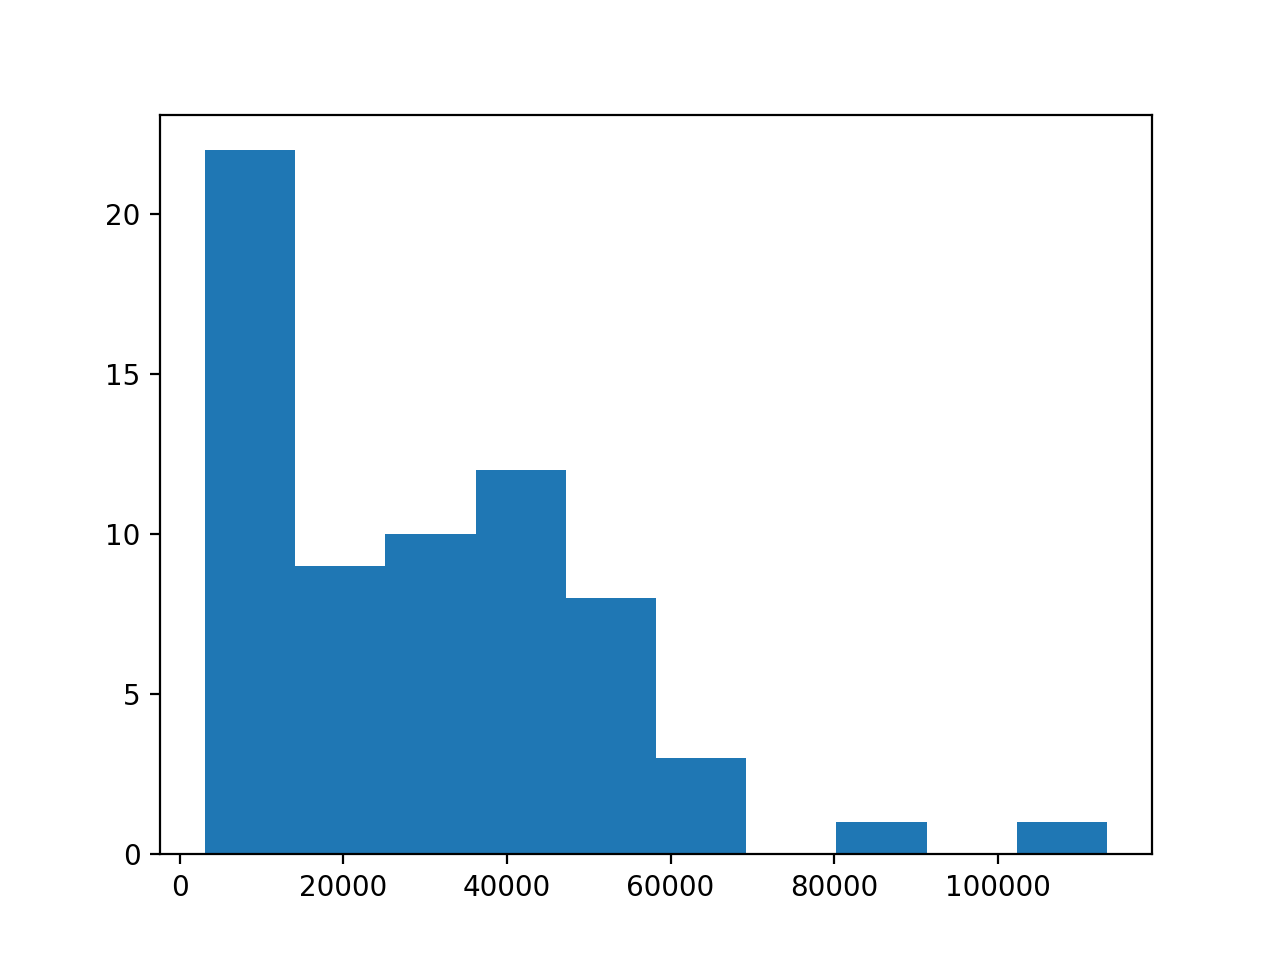

NormaltestResult(statistic=17.12741496788651, pvalue=0.00019091018350553921)

In [122]:
#Create a histogram to evaluate normal distribution

variable = data_df["2016_GDP"]
df_mean = np.mean(variable)
df_median = np.median(variable)
df_mode = st.mode(variable)
plt.hist(variable)
st.normaltest(variable.sample(37))
                         
#if p < 0.05, not normally distributed & use median 
#if p > 0.05, normally distributed & use mean

In [123]:
plt.close()

In [124]:
df_var = round(np.var(variable,ddof=0))
df_sd = round(np.std(variable,ddof=0))
df_z = round(st.zscore(variable))
df_z.head()

0    2.0
1   -0.0
2    1.0
3    1.0
4    1.0
Name: 2016_GDP, dtype: float64

In [125]:
df_pie = data_df.set_index("Country")
df_pie.head()

,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2016_Solar,2017_Solar,2018_Solar,2019_Solar,2020_Solar,Share of total consumption %
Country,,,,,,,,,,,
United Arab Emirates,63968.88804,67183.60531,68576.11552,71150.54214,66746.63494,42.0,255.0,494,1783,2539,NaN
Argentina,20307.87005,23597.11775,23293.39863,22999.27505,20762.99168,9.0,9.0,191,442,764,NaN
Australia,47255.30701,48398.54970,50100.22467,52030.64391,52397.38705,5900.0,7200.0,11300,15928,17627,10.7
Austria,52684.01711,54172.98679,57059.53894,58641.29812,55648.87456,1077.0,1250.0,1431,1578,2220,3.4
Belgium,48597.39998,50442.27054,52623.55967,54918.16620,52626.58164,3422.0,3800.0,4026,4531,5646,6.6


<IPython.core.display.Javascript object>


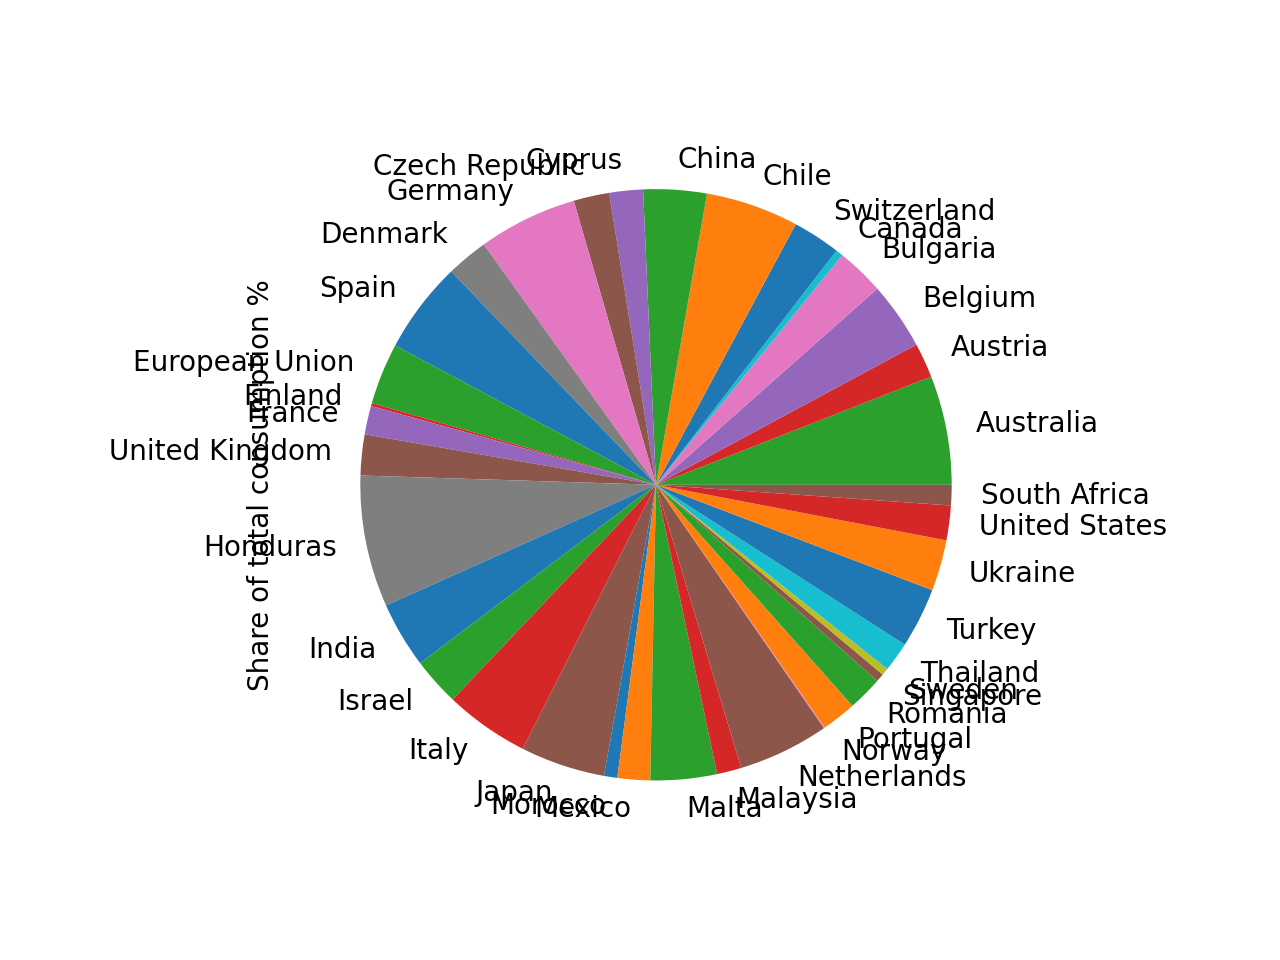

<AxesSubplot:ylabel='Share of total consumption %'>

In [126]:
df_pie.plot(kind="pie",y="Share of total consumption %",legend=None)

In [127]:
plt.close()

In [128]:
data_df.sort_values(by="2020_GDP",ascending=False)

,Country,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2016_Solar,2017_Solar,2018_Solar,2019_Solar,2020_Solar,Share of total consumption %
43,Luxembourg,113365.176100,114985.842200,117245.278900,119415.469800,118503.551000,122.0,127.0,134,150,195,NaN
62,Singapore,89417.349020,95350.435670,100581.158000,102573.401800,98483.342000,97.0,118.0,160,255,329,0.8
11,Switzerland,68105.154980,69103.570260,71671.515080,73143.758160,71760.586210,1640.0,1900.0,2246,2524,3118,4.7
0,United Arab Emirates,63968.888040,67183.605310,68576.115520,71150.542140,66746.634940,42.0,255.0,494,1783,2539,NaN
70,United States,58021.400500,60109.655730,63064.418410,65279.529030,63413.513860,40300.0,51000.0,53184,60682,75572,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...
5,Bangladesh,3848.957664,4160.703325,4547.480016,4954.761848,5136.739645,161.0,185.0,201,284,301,NaN
53,Pakistan,4410.006565,4571.205078,4853.266557,4896.393145,4811.097563,589.0,655.0,679,713,737,NaN
40,Kenya,3930.893858,4203.585011,4443.179109,4641.080377,4576.200469,32.0,39.0,105,106,106,NaN
41,Cambodia,3675.038620,3928.373934,4259.203119,4574.403027,4419.834110,18.0,29.0,29,99,208,NaN


In [129]:
#Find average GDP for each country from 2016-2020
data_df["average_GDP"] = data_df[["2016_GDP","2017_GDP","2018_GDP","2019_GDP","2020_GDP"]].mean(axis=1)

#Sort GDP averages from highest to lowest
avg_gdp = data_df.sort_values(by="average_GDP",ascending=False)

#Sort GDP averages from lowest to highest
avg_gdp_bottom = data_df.sort_values(by="average_GDP",ascending=True)
avg_gdp_bottom.head()

,Country,2016_GDP,2017_GDP,2018_GDP,2019_GDP,2020_GDP,2016_Solar,2017_Solar,2018_Solar,2019_Solar,2020_Solar,Share of total consumption %,average_GDP
61,Senegal,3075.937351,3203.906368,3388.946311,3503.617548,3501.515601,43.0,113.0,134,134,155,NaN,3334.784636
41,Cambodia,3675.038620,3928.373934,4259.203119,4574.403027,4419.834110,18.0,29.0,29,99,208,NaN,4171.370562
40,Kenya,3930.893858,4203.585011,4443.179109,4641.080377,4576.200469,32.0,39.0,105,106,106,NaN,4358.987765
5,Bangladesh,3848.957664,4160.703325,4547.480016,4954.761848,5136.739645,161.0,185.0,201,284,301,NaN,4529.728500
53,Pakistan,4410.006565,4571.205078,4853.266557,4896.393145,4811.097563,589.0,655.0,679,713,737,NaN,4708.393782


<IPython.core.display.Javascript object>


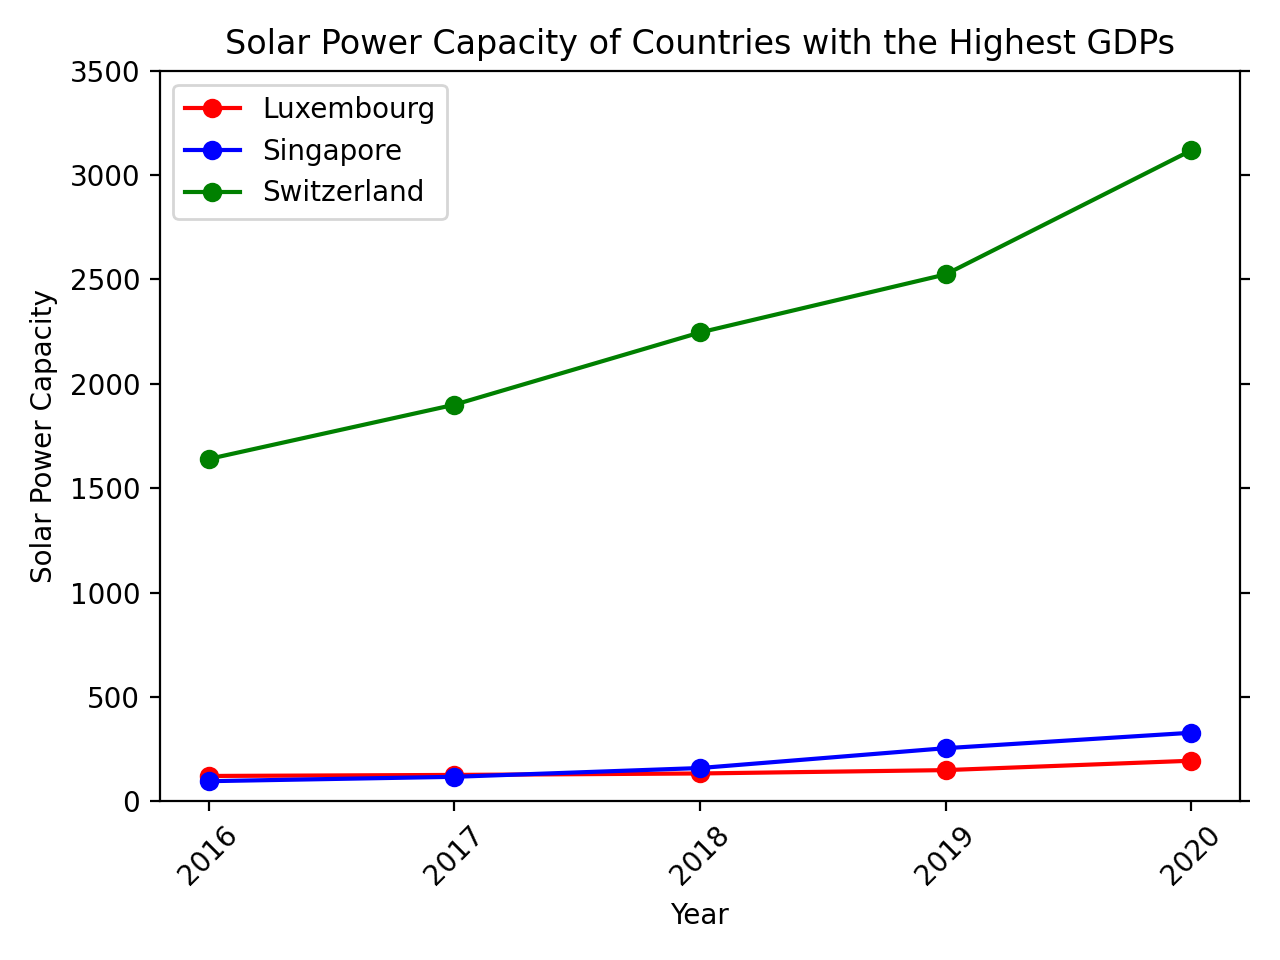

In [140]:
luxembourg = avg_gdp.loc[avg_gdp["Country"] == "Luxembourg", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]
singapore = avg_gdp.loc[avg_gdp["Country"] == "Singapore", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]
switzerland = avg_gdp.loc[avg_gdp["Country"] == "Switzerland", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]

luxembourg_list = list(luxembourg.values[0])
singapore_list = list(singapore.values[0])
switzerland_list = list(switzerland.values[0])
years=["2016","2017","2018","2019","2020"]

lux_plot, = plt.plot(years, luxembourg_list, marker="o", color="r", linewidth=1.5, alpha=1, label="Luxembourg")
sing_plot, = plt.plot(years, singapore_list, marker="o", color="b", linewidth=1.5, alpha=1, label="Singapore")
switz_plot, = plt.plot(years, switzerland_list, marker="o", color="g", linewidth=1.5, alpha=1, label="Switzerland")
plt.legend(handles=[lux_plot, sing_plot, switz_plot],loc="upper left")

plt.title("Solar Power Capacity of Countries with the Highest GDPs")
plt.xlabel("Year")
plt.ylabel("Solar Power Capacity")
plt.ylim(0,3500)
plt.xticks(rotation=45)
plt.tick_params(axis='y', which='both', left=True, right=True)
plt.savefig("../my_project2/Images/Solar_Capacity_Highest_GDP.png",bbox_inches="tight")
plt.tight_layout()
plt.show()

In [141]:
plt.close()

<IPython.core.display.Javascript object>


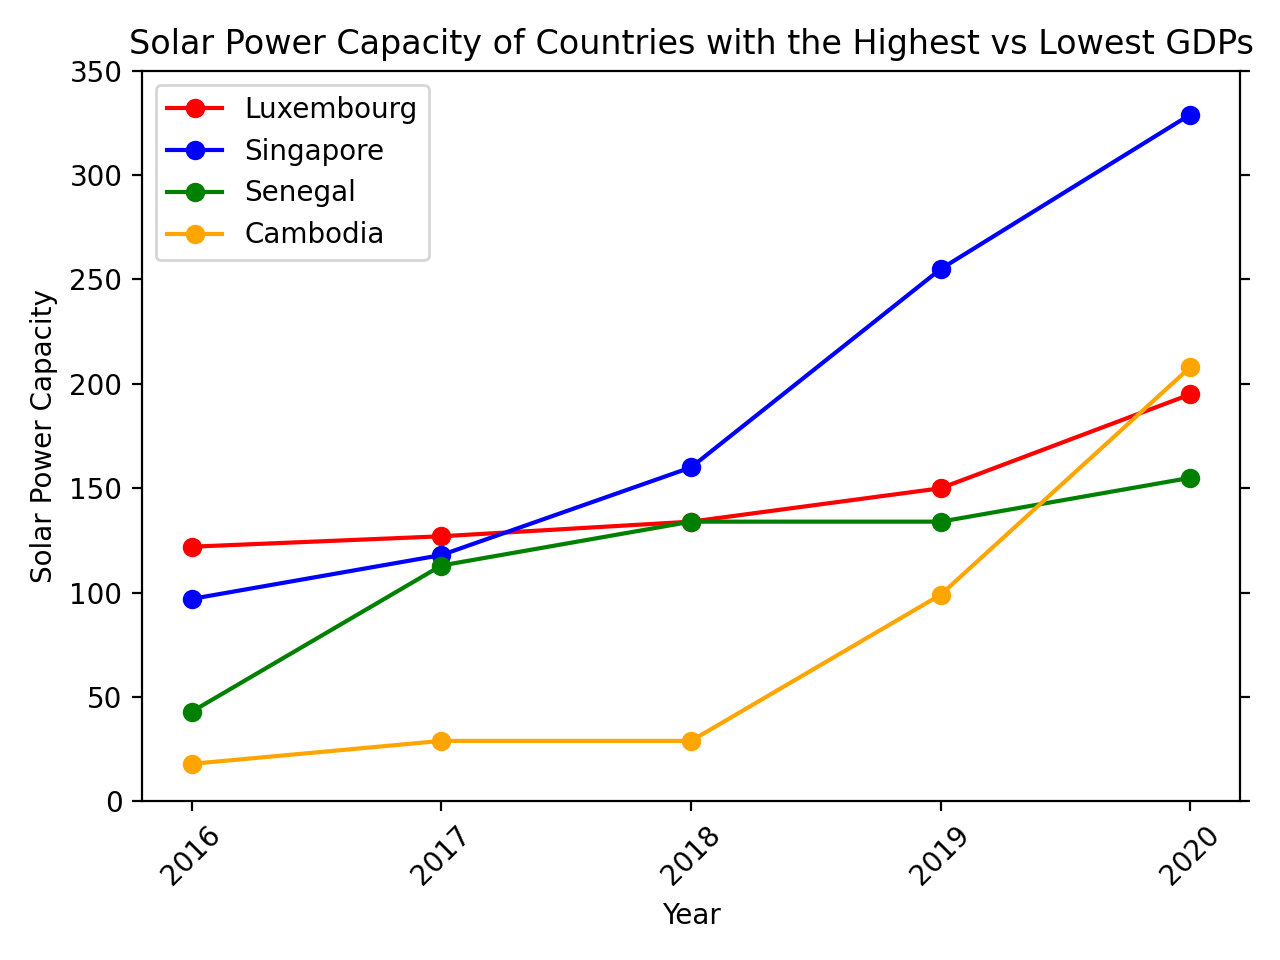

In [151]:
luxembourg = avg_gdp.loc[avg_gdp["Country"] == "Luxembourg", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]
singapore = avg_gdp.loc[avg_gdp["Country"] == "Singapore", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]
senegal = avg_gdp.loc[avg_gdp["Country"] == "Senegal", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]
cambodia = avg_gdp.loc[avg_gdp["Country"] == "Cambodia", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]

years=["2016","2017","2018","2019","2020"]
luxembourg_list = list(luxembourg.values[0])
singapore_list = list(singapore.values[0])
senegal_list = list(senegal.values[0])
cambodia_list = list(cambodia.values[0])

lux_plot, = plt.plot(years, luxembourg_list, marker="o", color="r", linewidth=1.5, alpha=1, label="Luxembourg")
sing_plot, = plt.plot(years, singapore_list, marker="o", color="b", linewidth=1.5, alpha=1, label="Singapore")
sen_plot, = plt.plot(years, senegal_list, marker="o", color="g", linewidth=1.5, alpha=1, label="Senegal")
cam_plot, = plt.plot(years, cambodia_list, marker="o", color="orange", linewidth=1.5, alpha=1, label="Cambodia")
plt.legend(handles=[lux_plot, sing_plot, sen_plot, cam_plot],loc="upper left")

plt.title("Solar Power Capacity of Countries with the Highest vs Lowest GDPs")
plt.xlabel("Year")
plt.ylabel("Solar Power Capacity")
plt.ylim(0,350)
plt.xticks(rotation=45)
plt.tick_params(axis='y', which='both', left=True, right=True)
plt.savefig("../my_project2/Images/Solar_Capacity_Highest_vs_Lowest_GDP_Linear.png",bbox_inches="tight")
plt.tight_layout()
plt.show()

In [152]:
plt.close()

<IPython.core.display.Javascript object>


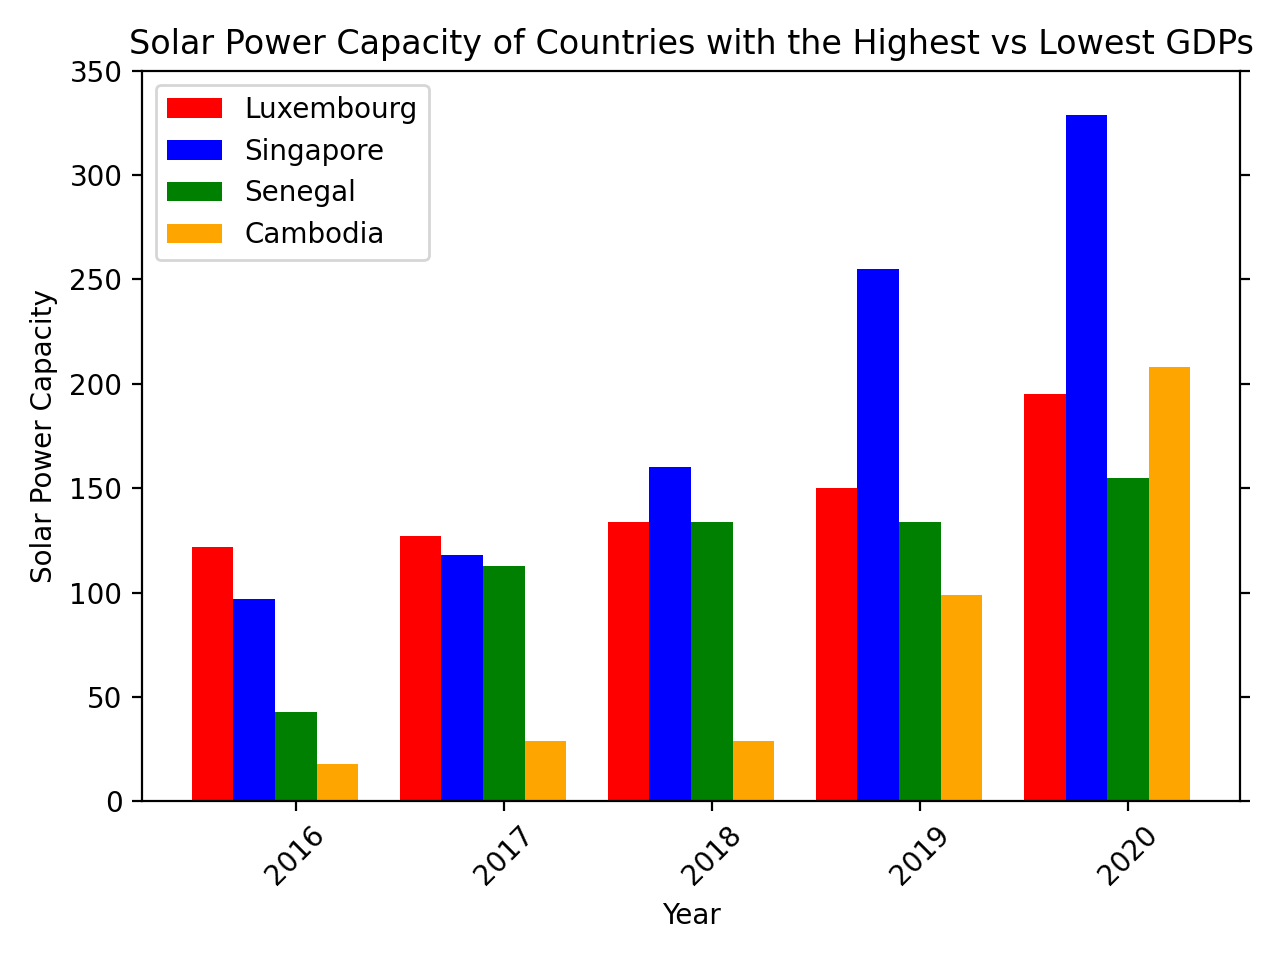

In [153]:
luxembourg = avg_gdp.loc[avg_gdp["Country"] == "Luxembourg", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]
singapore = avg_gdp.loc[avg_gdp["Country"] == "Singapore", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]
senegal = avg_gdp.loc[avg_gdp["Country"] == "Senegal", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]
cambodia = avg_gdp.loc[avg_gdp["Country"] == "Cambodia", ["2016_Solar","2017_Solar","2018_Solar","2019_Solar","2020_Solar"]]

years=["2016","2017","2018","2019","2020"]
luxembourg_list = list(luxembourg.values[0])
singapore_list = list(singapore.values[0])
senegal_list = list(senegal.values[0])
cambodia_list = list(cambodia.values[0])
colors = ["red","blue","green","yellow"]

lux_plot = plt.bar(np.arange(len(years))-0.4, luxembourg_list, color="red", alpha=1, align="center", label="Luxembourg", width=0.2)
sing_plot = plt.bar(np.arange(len(years))-0.2, singapore_list, color="blue", alpha=1, align="center", label="Singapore", width=0.2)
sen_plot = plt.bar(np.arange(len(years))+0, senegal_list, color="green", alpha=1, align="center", label="Senegal", width=0.2)
cam_plot = plt.bar(np.arange(len(years))+0.2, cambodia_list, color="orange", alpha=1, align="center", label="Cambodia", width=0.2)
plt.legend(handles=[lux_plot, sing_plot, sen_plot, cam_plot],loc="upper left")

plt.title("Solar Power Capacity of Countries with the Highest vs Lowest GDPs")
plt.xlabel("Year")
plt.ylabel("Solar Power Capacity")
plt.ylim(0,350)
plt.xticks(np.arange(5), years, rotation=45)
plt.tick_params(axis='y', which='both', left=True, right=True)
plt.savefig("../my_project2/Images/Solar_Capacity_Highest_vs_Lowest_GDP_Bar.png",bbox_inches="tight")
plt.tight_layout()
plt.show()

In [154]:
plt.close()